
Estimation:

· Its a statistical method use to infer population based on sample data.
1. Point estimate: Provides a single best estimate for a population parameter (eg: sample mean for population but doesnot indicate reliability).

2. Confidence Interval Estimation: Offers a range of values likely to contain the population parameter, accompanied by a confidence level (e.g., 95%). This includes:

. Poirft Estimate (e.g., x")
. Margin of Error: Calculated using the standard error SE and critical value Z or t.
· Key Formula for Confidence Interval:
. Cl=Point Estimate±Margin of Error

# 1. Assume Tips dataset as population
# 2. Drawing a random sample from the population
# 3. Calculate the Sample Mean as the Point estimate for the population mean.

I
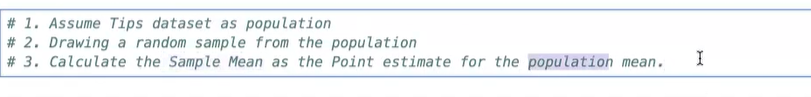

In [2]:
#Estimation
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tips=sns.load_dataset('tips')

In [4]:
population_df=tips.copy()

In [5]:
population_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
sample_size=50
sample_df=population_df.sample(n=sample_size,random_state=77,ignore_index=True)
sample_df

,total_bill,tip,sex,smoker,day,time,size
0,8.77,2.00,Male,No,Sun,Dinner,2
1,19.77,2.00,Male,No,Sun,Dinner,4
2,18.71,4.00,Male,Yes,Thur,Lunch,3
3,32.68,5.00,Male,Yes,Thur,Lunch,2
4,12.54,2.50,Male,No,Sun,Dinner,2
5,27.20,4.00,Male,No,Thur,Lunch,4
6,21.58,3.92,Male,No,Sun,Dinner,2
7,28.55,2.05,Male,No,Sun,Dinner,3
8,18.43,3.00,Male,No,Sun,Dinner,4
9,9.68,1.32,Male,No,Sun,Dinner,2


In [7]:
population_mean=population_df['total_bill'].mean()


In [8]:
sample_mean=sample_df['total_bill'].mean()

In [9]:
print(f"population mean: {population_mean}")
print(f"sample mean: {sample_mean}")

population mean: 19.78594262295082
sample mean: 18.4988


# Confidence Interval Estimation:

- Provides a range of value likely to contain true population mean. For example a 95% confidence interval means we are 95% confident
that the population mean lies within the interval.

Steps:
1. Take a random sample of size n=50. (n>=30)
2. Calculate the sample mean and use the known population std.
3. Compute the margin of error (MOE= Z*Standard Error) where SE= std(population)/sqroot(n)
4. use sample_mean + MOE and sample_mean-MOE to calculate the confidence Interval


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy  import stats

In [11]:
population=tips.copy()
population

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
n=50
sample_df=population_df.sample(n=n,random_state=77,ignore_index=True)
sample_df

,total_bill,tip,sex,smoker,day,time,size
0,8.77,2.00,Male,No,Sun,Dinner,2
1,19.77,2.00,Male,No,Sun,Dinner,4
2,18.71,4.00,Male,Yes,Thur,Lunch,3
3,32.68,5.00,Male,Yes,Thur,Lunch,2
4,12.54,2.50,Male,No,Sun,Dinner,2
5,27.20,4.00,Male,No,Thur,Lunch,4
6,21.58,3.92,Male,No,Sun,Dinner,2
7,28.55,2.05,Male,No,Sun,Dinner,3
8,18.43,3.00,Male,No,Sun,Dinner,4
9,9.68,1.32,Male,No,Sun,Dinner,2


In [13]:
population_std=population["total_bill"].std()
sample_mean=population["total_bill"].mean()
print(population_std,sample_mean)

8.902411954856856 19.78594262295082


In [14]:
# Compute the margin of error (MOE= Z*Standard Error) where SE= std(population)/sqroot(n)

# for calculating this we will be given significane level,pop std ,and sampled mean we will need to find confidence interval


# z-critical value for 95% confidence interval -1.96


confidence_level=0.95
z=1.96
Standard_error=population_std/np.sqrt(n)
MOE=z*Standard_error
print(Standard_error,MOE)


1.2589911724390943 2.467622697980625


In [15]:
# use sample_mean + MOE and sample_mean-MOE to calculate the confidence Interval


lower_bound=sample_mean-MOE
upper_bound=sample_mean+MOE
print(sample_mean)
print(lower_bound,upper_bound)

19.78594262295082
17.318319924970197 22.253565320931443


A restaurant manager wants to estimate the average total tips| that customers pay at their restaurant. To do this,
they decide to use data collected over the past few months (i.e., the Tips dataset) and treat it as the population.
From this population, the manager randomly selects a samdle of 50 bills to analyze. The manager assumes that the population
standard deviation of total bills is known from past records.
Using this sample, construct a 95% confidence interval to estimate the true average total tips paid by customers.

Calculate a 95% confidence interval for the population mean of total_bill, using:
A random sample of size 50 from the Tips dataset
The population standard deviation (assumed known)

In [16]:
population_std=population["tip"].std()
sample_mean=population["tip"].mean()
print(population_std,sample_mean)

1.3836381890011822 2.99827868852459


In [17]:
z=2.576

In [18]:
confidence_level=0.99
Standard_error=population_std/np.sqrt(n)
MOE=z*Standard_error
print(Standard_error,MOE)

0.19567598923028195 0.5040613482572063


In [19]:
lower_bound=sample_mean-MOE
upper_bound=sample_mean+MOE
print(sample_mean)
print(lower_bound,upper_bound)

2.99827868852459
2.4942173402673835 3.502340036781796


## T distribution vs Normal Distribution

Key Differences

1. Shape:

The Normal distribution is bell-shaped and symmetric, with thinner tails.
The T-distribution is also bell-shaped and symmetric but has heavier tails, meaning it allocates more probability yin lthe tails.

2. Applicability:

Normal distribution is used when the population standard deviation (o) is known or when the sample size is large (n>30).
T-distribution is used when (\sigma) is unknown and estimated with the sample standard deviation ((s)), especially with smaller samples ((n
\leq 30)).

3. Heavier Tails:

The heavier tails of the T-distribution account for the additional variabitity introduced by estimating o using s from small samples. This
ensures that the critical values are adjusted for smaller sample sizes, providing more conservative confidence intervals or hypothesis tests

4. Convergence:

As the sample size increases (n-o), the T-distribution approaches the Normal distribution. This happens because the sample standard
deviation s becomes a more reliable estimate of o, reducing uncertainty.
Let's calculate the critical values for both distributions at a 95% confidence level for two scenarios:

A small sample size n = 10, df = n - 1 = 9.
A large sample size n = 100, df = n - 1 = 99.

# Steps for finding confidence interval when population std is unknown.

1. Take random samples. (n<30)

2. Calculate the sample statistics for example- sample mean and sample std deviation.

3. Set confidence interval and MOE:

      1. SE(Standard error)= SE= sample_std/sqrt(n)
      2. Determine the T critical value using t distribution with df n-1.
      3. Compute Margin of Error: MOE= t(Critical)*SE
4. Confidence_interval=sample_mean+MOE Confidence_interval=sample_mean-MOE

In [20]:
#step-1 take the random sample from the population


n=25
sample_df=population.sample(n=n,random_state=77,ignore_index=True)
sample_df

,total_bill,tip,sex,smoker,day,time,size
0,8.77,2.00,Male,No,Sun,Dinner,2
1,19.77,2.00,Male,No,Sun,Dinner,4
2,18.71,4.00,Male,Yes,Thur,Lunch,3
3,32.68,5.00,Male,Yes,Thur,Lunch,2
4,12.54,2.50,Male,No,Sun,Dinner,2
5,27.20,4.00,Male,No,Thur,Lunch,4
6,21.58,3.92,Male,No,Sun,Dinner,2
7,28.55,2.05,Male,No,Sun,Dinner,3
8,18.43,3.00,Male,No,Sun,Dinner,4
9,9.68,1.32,Male,No,Sun,Dinner,2


In [22]:
#step 2- finding sample mean and standard deviation for the total bill column
sample_mean=sample_df['total_bill'].mean()
print(sample_mean)
sample_std=sample_df['total_bill'].std()
print(sample_std)

19.119600000000002
7.112303588383536


In [27]:
#step 3 -confidence interval
confidence_level=0.95
df=n-1
t_criticalvalue=stats.t.ppf((1-confidence_level)/2,df)
t_criticalvalue


np.float64(-2.0638985616280205)

In [28]:
#finding the standard error

se=sample_std/np.sqrt(n)
se

np.float64(1.4224607176767072)

In [30]:
#calculating the moe(margin of the error)


moe=t_criticalvalue*se
moe

np.float64(-2.9358146291853178)

In [32]:
#finding the confidence interval

lower_bound=sample_mean-moe
upper_bound=sample_mean+moe
print(sample_mean)
print(lower_bound,upper_bound)
population['total_bill'].mean()

19.119600000000002
22.05541462918532 16.183785370814682


np.float64(19.78594262295082)